Let us first generate data which has noise in it.
lets consider a simple function 
$$ y = sinx $$

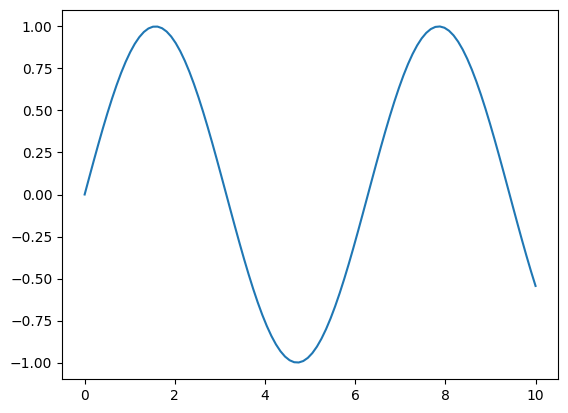

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y)

Lets add some noise to the input data.

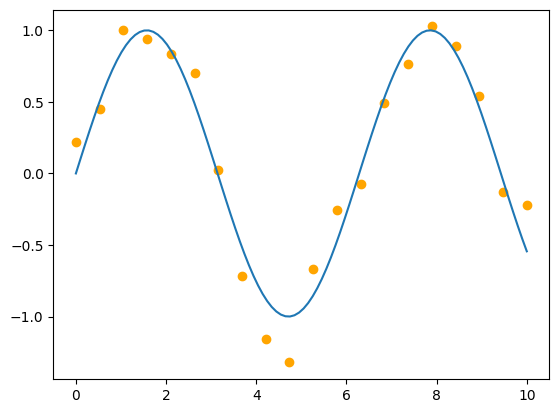

In [2]:

n_train = 20
x_train = np.linspace(0,10,n_train)
y_train = np.sin(x_train)
y_train = y_train+np.random.normal(loc=0, scale=0.15, size = n_train)
plt.scatter(x_train,y_train, color="orange")
plt.plot(x,y)
plt.show()

Now let us scale the input data to avoid any possible errors

In [3]:
x_train_scaled


NameError: name 'x_train_scaled' is not defined

In [4]:
from sklearn.preprocessing import MinMaxScaler
x_train_scaled = x_train.reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(x_train_scaled)
x_train_scaled = scaler.transform(x_train_scaled)

Let us fit GPR into the noise data without using the whie kernel to see how it looks like.

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor as gpr
from sklearn.gaussian_process.kernels import WhiteKernel,RBF

ls_no_noise = [1]
lsb_no_noise = [0.01,10]
no_noise_kernel = 1*RBF(length_scale = ls_no_noise,length_scale_bounds =lsb_no_noise)
gp_no_noise = gpr(kernel=no_noise_kernel,n_restarts_optimizer=100,random_state=1)
gp_no_noise.max_iter_predict = 10000

gp_no_noise.fit(x_train_scaled,y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=100, random_state=1)

In [6]:
gp_no_noise.kernel_

0.614**2 * RBF(length_scale=0.0637)

Text(0.5, 1.0, '0 noise GPR for data with noise')

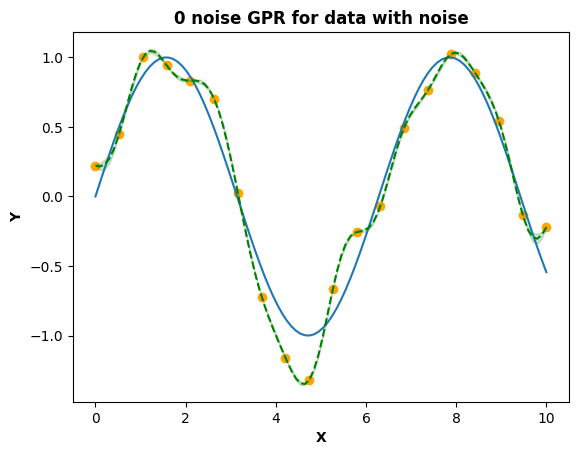

In [18]:
x_test = x
x_test = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test)
y_mean_predict,y_sd_predict = gp_no_noise.predict(x_test_scaled,return_std=True)
plt.plot(x,y,label="actual solution")
plt.scatter(x_train,y_train,color="orange",label="data")
plt.plot(x_test,y_mean_predict,"g--", label="gp_no_noise")
plt.fill_between(x,y_mean_predict+y_sd_predict,y_mean_predict-y_sd_predict,color="green", alpha=0.2)
plt.xlabel("X", fontweight="bold")
plt.ylabel("Y",fontweight="bold")
plt.title("0 noise GPR for data with noise", fontweight="bold")

Now Let us fit gpr with white noise.

In [11]:
ls_noise1 = [1]
lsb_noise1 = [1e-1,10]
noise1_kernel =  1.0 * RBF(length_scale=ls_noise1, length_scale_bounds=lsb_noise1) + WhiteKernel(
    noise_level=2, noise_level_bounds=(1e-10, 1e1))
gp_noise1 = gpr(kernel=noise1_kernel,n_restarts_optimizer=100,random_state=1)
gp_noise1.max_iter_predict = 10000

gp_noise1.fit(x_train_scaled,y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=2),
                         n_restarts_optimizer=100, random_state=1)

In [12]:
gp_noise1.kernel_

0.705**2 * RBF(length_scale=0.116) + WhiteKernel(noise_level=0.0134)

Text(0.5, 1.0, 'Demonstrating GPR for data with noise')

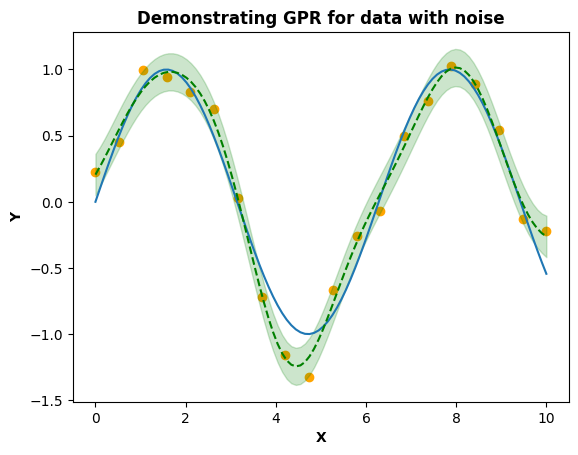

In [17]:
x_test = x
x_test = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test)
y_mean_predict_noise1,y_sd_predict_noise1 = gp_noise1.predict(x_test_scaled,return_std=True)
plt.plot(x,y,label="actual solution")
plt.scatter(x_train,y_train,color="orange",label="data")
plt.plot(x_test,y_mean_predict_noise1,"g--", label="gp_no_noise")
plt.fill_between(x,y_mean_predict_noise1+y_sd_predict_noise1,y_mean_predict_noise1-y_sd_predict_noise1,color="green", alpha=0.2)
plt.xlabel("X", fontweight="bold")
plt.ylabel("Y",fontweight="bold")
plt.title("Demonstrating GPR for data with noise", fontweight="bold")

0.743**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.1)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0.5, 1.0, 'Demonstrating GPR for data with noise')

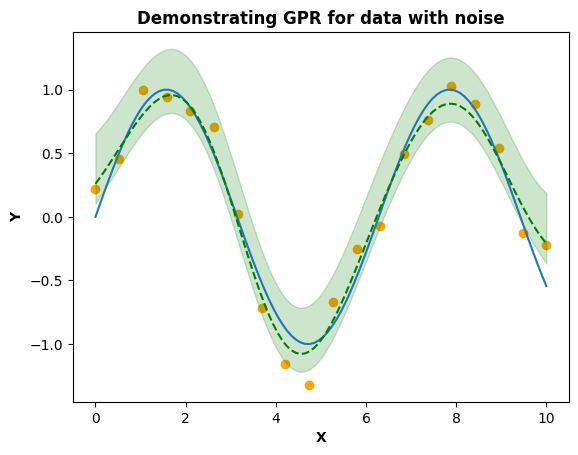

In [74]:
ls_noise2 = [10]
lsb_noise2 = [1e-9,1e9]
noise2_kernel =  1.0 * RBF(length_scale=ls_noise2, length_scale_bounds=lsb_noise2) + WhiteKernel(
    noise_level=10, noise_level_bounds=(1e-1, 1e1))
gp_noise2 = gpr(kernel=noise2_kernel,n_restarts_optimizer=100,random_state=1)
gp_noise2.max_iter_predict = 1000

gp_noise2.fit(x_train_scaled,y_train)
print(gp_noise2.kernel_)
x_test = x
x_test = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test)
y_mean_predict_noise2,y_sd_predict_noise2 = gp_noise2.predict(x_test_scaled,return_std=True)
plt.plot(x,y,label="actual solution")
plt.scatter(x_train,y_train,color="orange",label="data")
plt.plot(x_test,y_mean_predict_noise2,"g--", label="gp_no_noise")
plt.fill_between(x,y_mean_predict_noise2+y_sd_predict_noise2,y_mean_predict_noise2-y_sd_predict_noise1,color="green", alpha=0.2)
plt.xlabel("X", fontweight="bold")
plt.ylabel("Y",fontweight="bold")
plt.title("Demonstrating GPR for data with noise", fontweight="bold")

0.705**2 * RBF(length_scale=0.116) + WhiteKernel(noise_level=0.0134)


Text(0.5, 1.0, 'Demonstrating GPR for data with noise')

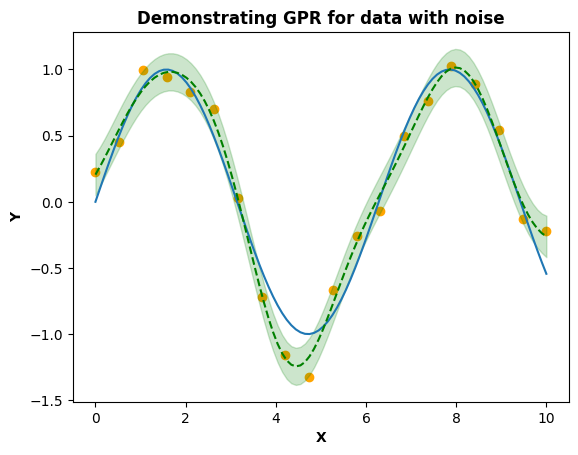

In [75]:
ls_noise2 = [10]
lsb_noise2 = [1e-9,1e9]
noise2_kernel =  1.0 * RBF(length_scale=ls_noise2, length_scale_bounds=lsb_noise2) + WhiteKernel(
    noise_level=10, noise_level_bounds=(1e-2, 1e1))
gp_noise2 = gpr(kernel=noise2_kernel,n_restarts_optimizer=100,random_state=1)
gp_noise2.max_iter_predict = 1000

gp_noise2.fit(x_train_scaled,y_train)
print(gp_noise2.kernel_)
x_test = x
x_test = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test)
y_mean_predict_noise2,y_sd_predict_noise2 = gp_noise2.predict(x_test_scaled,return_std=True)
plt.plot(x,y,label="actual solution")
plt.scatter(x_train,y_train,color="orange",label="data")
plt.plot(x_test,y_mean_predict_noise2,"g--", label="gp_no_noise")
plt.fill_between(x,y_mean_predict_noise2+y_sd_predict_noise2,y_mean_predict_noise2-y_sd_predict_noise1,color="green", alpha=0.2)
plt.xlabel("X", fontweight="bold")
plt.ylabel("Y",fontweight="bold")
plt.title("Demonstrating GPR for data with noise", fontweight="bold")

0.705**2 * RBF(length_scale=0.116) + WhiteKernel(noise_level=0.0134)


Text(0.5, 1.0, 'Demonstrating GPR for data with noise')

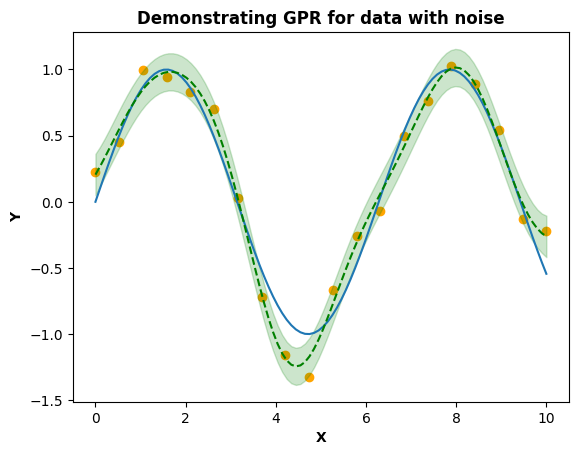

In [77]:
ls_noise2 = [10]
lsb_noise2 = [1e-9,1e9]
noise2_kernel =  1.0 * RBF(length_scale=ls_noise2, length_scale_bounds=lsb_noise2) + WhiteKernel(
    noise_level=0.001, noise_level_bounds=(1e-4, 1e1))
gp_noise2 = gpr(kernel=noise2_kernel,n_restarts_optimizer=100,random_state=1)
gp_noise2.max_iter_predict = 1000

gp_noise2.fit(x_train_scaled,y_train)
print(gp_noise2.kernel_)
x_test = x
x_test = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test)
y_mean_predict_noise2,y_sd_predict_noise2 = gp_noise2.predict(x_test_scaled,return_std=True)
plt.plot(x,y,label="actual solution")
plt.scatter(x_train,y_train,color="orange",label="data")
plt.plot(x_test,y_mean_predict_noise2,"g--", label="gp_no_noise")
plt.fill_between(x,y_mean_predict_noise2+y_sd_predict_noise2,y_mean_predict_noise2-y_sd_predict_noise1,color="green", alpha=0.2)
plt.xlabel("X", fontweight="bold")
plt.ylabel("Y",fontweight="bold")
plt.title("Demonstrating GPR for data with noise", fontweight="bold")